# 1. Import the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
file_path = "../data_sets/dataset_raw.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,category,text
0,0,i didnt feel humiliated
1,0,i can go from feeling so hopeless to so damned...
2,3,im grabbing a minute to post i feel greedy wrong
3,2,i am ever feeling nostalgic about the fireplac...
4,3,i am feeling grouchy


In [4]:
X = data['text']
y = data['category']

# Splitting the data into training and temporary set (60% training and 50% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and testing sets (50% validation and 50% testing for the subset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12000,)
X_val shape: (4000,)
X_test shape: (4000,)
y_train shape: (12000,)
y_val shape: (4000,)
y_test shape: (4000,)


## 2. Encoder 1 - CountVectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# any example to show how the encoder works
X_try = X[0:4].copy(deep=True)
X_try

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
Name: text, dtype: object

In [7]:
'''
parameter explanation:
stop_words = ''english'' -> remove “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text
min_df = 0.02 -> When building the vocabulary -> ignore terms that have a document frequency < 0.02
ngram_range = (1,1)  unigram -> tal
'''
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.02, ngram_range=(1, 1))
X_encoded_try_1 = vectorizer_try.fit_transform(X_try)
print('Data shape: ', X_encoded_try_1.shape)

Data shape:  (4, 20)


In [8]:
vectorizer_try_2 = CountVectorizer(stop_words='english',min_df=0.02, ngram_range=(2, 2))
X_encoded_try_2 = vectorizer_try_2.fit_transform(X_try)
print('Data shape: ', X_encoded_try_2.shape)

Data shape:  (4, 18)


### Note:
why min_df = 0.02? Or How do we represent rarely appeared words?

**Option 1: the UNK token**

Replace all rare words (with a frequency at or below a given threshold, e.g. 2,
3, or 5) in your training data with an UNK token (UNK = “Unknown word”).  
Replace all unknown words that you come across after training (including rare
training words) with the same UNK token

**Option 2: substring-based representations**  
[often used in neural models]  
Represent (rare and unknown) words [“Champaign”] as sequences of
characters [‘C’, ‘h’, ‘a’,…,’g’, ’n'] or substrings [“Ch”, “amp”, “ai”, “gn”]

In [9]:
X_try

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
Name: text, dtype: object

In [10]:
# ngram_range=(1, 1)
vectorizer_try.get_feature_names_out()

array(['awake', 'cares', 'damned', 'didnt', 'feel', 'feeling',
       'fireplace', 'grabbing', 'greedy', 'hopeful', 'hopeless',
       'humiliated', 'im', 'just', 'know', 'minute', 'nostalgic', 'post',
       'property', 'wrong'], dtype=object)

In [11]:
# ngram_range=(1, 2)
vectorizer_try_2.get_feature_names_out()

array(['cares awake', 'damned hopeful', 'didnt feel', 'feel greedy',
       'feel humiliated', 'feeling hopeless', 'feeling nostalgic',
       'fireplace know', 'grabbing minute', 'greedy wrong',
       'hopeful just', 'hopeless damned', 'im grabbing', 'just cares',
       'know property', 'minute post', 'nostalgic fireplace', 'post feel'],
      dtype=object)

In [12]:
dense_matrix = pd.DataFrame(X_encoded_try_1.toarray(), columns=vectorizer_try.get_feature_names_out())
dense_matrix

,awake,cares,damned,didnt,feel,feeling,fireplace,grabbing,greedy,hopeful,hopeless,humiliated,im,just,know,minute,nostalgic,post,property,wrong
0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1
3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0


In [13]:
dense_matrix_2 = pd.DataFrame(X_encoded_try_2.toarray(), columns=vectorizer_try_2.get_feature_names_out())
dense_matrix_2

,cares awake,damned hopeful,didnt feel,feel greedy,feel humiliated,feeling hopeless,feeling nostalgic,fireplace know,grabbing minute,greedy wrong,hopeful just,hopeless damned,im grabbing,just cares,know property,minute post,nostalgic fireplace,post feel
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0


In [14]:
# The function will generates a histogram to show how many unique words (from the vocabulary) are in each review
def review_word_count_histgram(X):
    '''
    X:  [# feature vectors, # features], feature vectors
    '''
    fig, axes = plt.subplots()

    dens = np.sum(X > 0, axis=1) # get unique word density for each comment
    axes.hist(dens, bins=30, edgecolor='black')
    axes.set_xlabel('Word counts', fontsize=14)

"\nInterpret:\nthere is 1 record has 3 unique words. (i didnt feel humiliated -> didnt, feel, humiliated)\nthere is 2 record has 7 unique words. ('im grabbing a minute to post i feel greedy wrong -> grabbing, minute, post, feel, greedy, wrong, im)\n\nWhat do we need to know that?\nThat essentially calculate how many features a post has.\n"

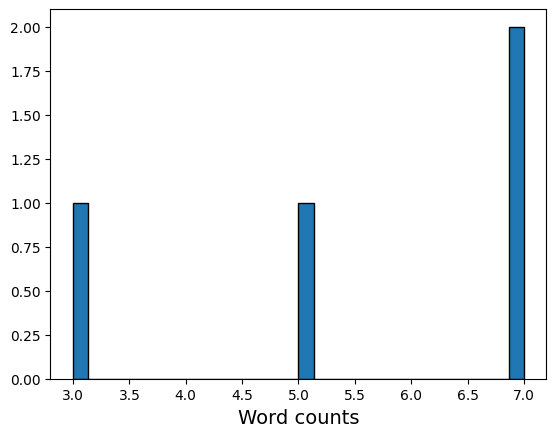

In [15]:
review_word_count_histgram(X_encoded_try_1)
'''
Interpret:
there is 1 record has 3 unique words. (i didnt feel humiliated -> didnt, feel, humiliated)
there is 2 record has 7 unique words. ('im grabbing a minute to post i feel greedy wrong -> grabbing, minute, post, feel, greedy, wrong, im)

What do we need to know that?
That essentially calculate how many features a post has.
'''

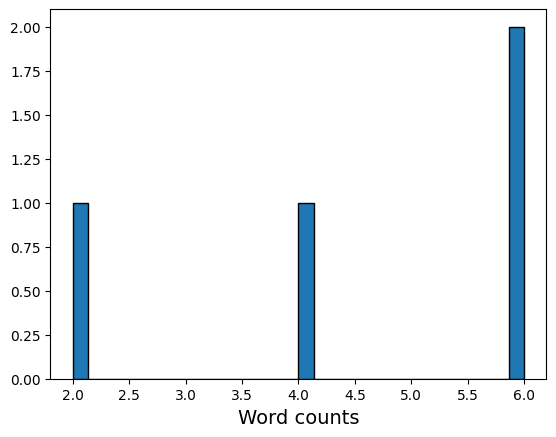

In [16]:
review_word_count_histgram(X_encoded_try_2)

## However:

In [17]:
# min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.01, ngram_range=(1, 1))
X_train_try_1 = vectorizer_try.fit_transform(X_train)
print('Data shape: ', X_train_try_1.shape)

Data shape:  (12000, 72)


In [18]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.01, ngram_range=(1, 3))
X_val_try_1 = vectorizer_try.fit_transform(X_val)
print('Data shape: ', X_val_try_1.shape)

Data shape:  (4000, 88)


In [19]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.01, ngram_range=(1, 1))
X_test_try_1 = vectorizer_try.fit_transform(X_test)
print('Data shape: ', X_test_try_1.shape)

Data shape:  (4000, 74)


### Note:
See? That could be a problem, since different subsets have different document frequency.

If we encode training set, validation set, testing set separately, the number of features that we get is not alignment.

we must encode the entire dataset first and then split it.

In [20]:
X.shape

(20000,)

In [21]:
y.shape

(20000,)

### A corrected way to do that


### Round 1:
tune min_df and ngram.

In [22]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.001, ngram_range=(1, 1))
X_1 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_1.shape)

Data shape:  (20000, 1261)


In [23]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.001, ngram_range=(2, 4))
X_2 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_2.shape)

Data shape:  (20000, 421)


In [24]:
# 1261 + 421 = 1682
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.001, ngram_range=(1, 4))
X_3 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_3.shape)

Data shape:  (20000, 1682)


In [25]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.003, ngram_range=(1, 1))
X_4 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_4.shape)

Data shape:  (20000, 512)


In [26]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.003, ngram_range=(2, 4))
X_5 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_5.shape)

Data shape:  (20000, 56)


In [27]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.003, ngram_range=(1, 4))
X_6 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_6.shape)

Data shape:  (20000, 568)


In [28]:
# double check
1261 + 396 == 1657

True

In [29]:
# Ref: https://medium.com/@thawsitt/assignment-vs-shallow-copy-vs-deep-copy-in-python-f70c2f0ebd86
# in python, assign by = is essentially set a another name of that value

# a = b.copy()
# equal assignment - makes the two variables point to the one list in memory.
# .copy -  a reference of an object is copied into another object, a.append() won't change b, a[1] will change b[1] too, it's like a pointer in C++. 
# .deepcopy - initial a new object, and populating it recursively.
y_1 = y_2 = y_3 = y_4 = y_5 = y_6 = y_7 = y

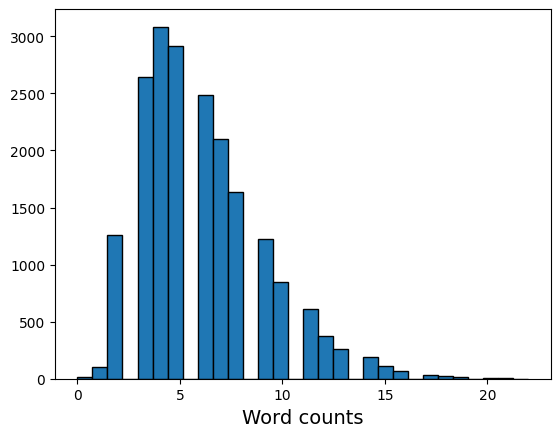

In [30]:
review_word_count_histgram(X_1)

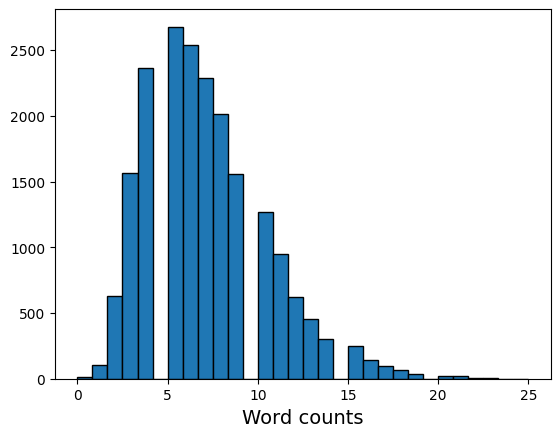

In [31]:
review_word_count_histgram(X_3)

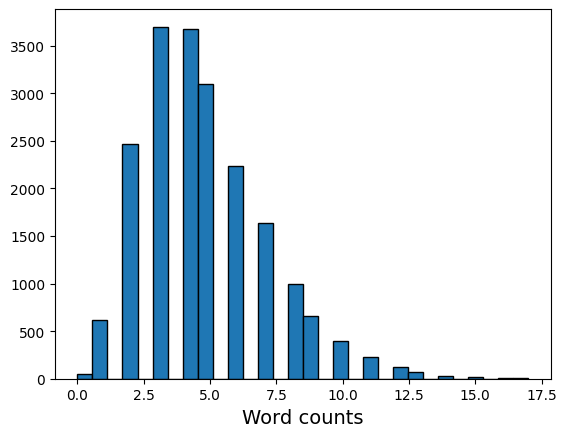

In [32]:
review_word_count_histgram(X_4)

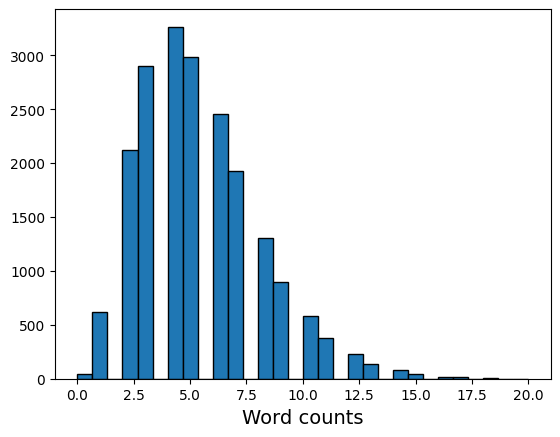

In [33]:
review_word_count_histgram(X_6)

# 3. Model_training

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [35]:
def logistic_classification(X_train, y_train, X_val, y_val, X_test, y_test):
    '''
    This function is designed to benchmark the performance of CountVectorizer()
    A rough result is all I need, therefore the hyperparameters of Logistic classifier is not important here.
    '''
    classifier = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', C = 0.8, random_state=42, max_iter = 100)
    classifier.fit(X_train, y_train)

    # Compute and print accuracy on the validation data
    val_predictions = classifier.predict(X_val)
    val_accuracy = np.mean(val_predictions == y_val)
    print('\nValidation accuracy:', format(100 * val_accuracy, '.2f'))

    # Compute and print the confusion matrix for validation data
    cm_val = confusion_matrix(y_val, val_predictions)
    print('\nConfusion Matrix (Validation):')
    print(cm_val)

    # Compute and print F1 score on the validation data
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    print('\nF1 Score (Validation):', format(val_f1, '.2f'))

    # Compute and print accuracy on the test data
    test_predictions = classifier.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)
    print('\nTesting accuracy:', format(100 * test_accuracy, '.2f'))

    # Compute and print the confusion matrix for test data
    cm_test = confusion_matrix(y_test, test_predictions)
    print('\nConfusion Matrix (Test):')
    print(cm_test)

    # Compute and print F1 score on the test data
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    print('\nF1 Score (Test):', format(test_f1, '.2f'))

    return classifier

In [36]:
# training vs validation vs testing = 6 : 2 : 2
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_1, y_1, test_size=0.4, random_state=42)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_1 shape:", X_train_1.shape)
print("X_val_1 shape:", X_val_1.shape)
print("X_test_1 shape:", X_test_1.shape)
print("y_train_1 shape:", y_train_1.shape)
print("y_val_1 shape:", y_val_1.shape)
print("y_test_1 shape:", y_test_1.shape)

# Calling logistic_classification function

X_train_1 shape: (12000, 1261)
X_val_1 shape: (4000, 1261)
X_test_1 shape: (4000, 1261)
y_train_1 shape: (12000,)
y_val_1 shape: (4000,)
y_test_1 shape: (4000,)


In [37]:
classifier = logistic_classification(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)


Validation accuracy: 87.65

Confusion Matrix (Validation):
[[1065   57    7   23   24    4]
 [  24 1218   50    6   10    4]
 [   7   64  274    4    0    0]
 [  35   43    1  451   20    1]
 [  23   24    0   11  383   13]
 [   2   13    0    4   20  115]]

F1 Score (Validation): 0.88

Testing accuracy: 88.75

Confusion Matrix (Test):
[[1078   51    3   25   17    1]
 [  21 1284   46    8    7    7]
 [   4   54  260    4    3    0]
 [  44   28    3  457   11    0]
 [  20   26    2   13  375   12]
 [   4    7    0    1   28   96]]

F1 Score (Test): 0.89


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
# Splitting the data and renaming variables
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X_3, y_3, test_size=0.4, random_state=42)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_3 shape:", X_train_3.shape)
print("X_val_3 shape:", X_val_3.shape)
print("X_test_3 shape:", X_test_3.shape)
print("y_train_3 shape:", y_train_3.shape)
print("y_val_3 shape:", y_val_3.shape)
print("y_test_3 shape:", y_test_3.shape)


X_train_3 shape: (12000, 1682)
X_val_3 shape: (4000, 1682)
X_test_3 shape: (4000, 1682)
y_train_3 shape: (12000,)
y_val_3 shape: (4000,)
y_test_3 shape: (4000,)


In [39]:
classifier = logistic_classification(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)


Validation accuracy: 87.98

Confusion Matrix (Validation):
[[1077   51    6   27   17    2]
 [  23 1217   54    5    9    4]
 [   7   60  278    4    0    0]
 [  32   42    3  453   19    2]
 [  23   25    0   10  381   15]
 [   2   13    0    5   21  113]]

F1 Score (Validation): 0.88

Testing accuracy: 89.08

Confusion Matrix (Test):
[[1084   51    3   23   13    1]
 [  17 1290   46    6    7    7]
 [   5   55  258    5    2    0]
 [  39   29    2  464    9    0]
 [  20   24    2   16  371   15]
 [   4    5    0    1   30   96]]

F1 Score (Test): 0.89


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
# Splitting the data and renaming variables
X_train_4, X_temp_4, y_train_4, y_temp_4 = train_test_split(X_4, y_4, test_size=0.4, random_state=42)
X_val_4, X_test_4, y_val_4, y_test_4 = train_test_split(X_temp_4, y_temp_4, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_4 shape:", X_train_4.shape)
print("X_val_4 shape:", X_val_4.shape)
print("X_test_4 shape:", X_test_4.shape)
print("y_train_4 shape:", y_train_4.shape)
print("y_val_4 shape:", y_val_4.shape)
print("y_test_4 shape:", y_test_4.shape)

X_train_4 shape: (12000, 512)
X_val_4 shape: (4000, 512)
X_test_4 shape: (4000, 512)
y_train_4 shape: (12000,)
y_val_4 shape: (4000,)
y_test_4 shape: (4000,)


In [41]:
classifier = logistic_classification(X_train_4, y_train_4, X_val_4, y_val_4, X_test_4, y_test_4)


Validation accuracy: 75.55

Confusion Matrix (Validation):
[[ 886  223   10   27   31    3]
 [  73 1165   53    7   11    3]
 [  18   98  228    5    0    0]
 [  62  101    3  359   23    3]
 [  50   84    1   11  294   14]
 [   7   33    0    1   23   90]]

F1 Score (Validation): 0.75

Testing accuracy: 76.35

Confusion Matrix (Test):
[[ 900  221    9   29   14    2]
 [  82 1221   48    6   12    4]
 [  16  105  194    4    5    1]
 [  60   89    4  377   13    0]
 [  38   90    5   14  288   13]
 [   9   20    0    2   31   74]]

F1 Score (Test): 0.76


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
# Splitting the data and renaming variables
X_train_6, X_temp_6, y_train_6, y_temp_6 = train_test_split(X_6, y_6, test_size=0.4, random_state=42)
X_val_6, X_test_6, y_val_6, y_test_6 = train_test_split(X_temp_6, y_temp_6, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_6 shape:", X_train_6.shape)
print("X_val_6 shape:", X_val_6.shape)
print("X_test_6 shape:", X_test_6.shape)
print("y_train_6 shape:", y_train_6.shape)
print("y_val_6 shape:", y_val_6.shape)
print("y_test_6 shape:", y_test_6.shape)


X_train_6 shape: (12000, 568)
X_val_6 shape: (4000, 568)
X_test_6 shape: (4000, 568)
y_train_6 shape: (12000,)
y_val_6 shape: (4000,)
y_test_6 shape: (4000,)


In [43]:
classifier = logistic_classification(X_train_6, y_train_6, X_val_6, y_val_6, X_test_6, y_test_6)


Validation accuracy: 75.72

Confusion Matrix (Validation):
[[ 896  215   10   29   26    4]
 [  75 1160   54    9   11    3]
 [  18   93  232    5    1    0]
 [  62  101    2  360   23    3]
 [  54   81    1   12  292   14]
 [   7   34    0    0   24   89]]

F1 Score (Validation): 0.76

Testing accuracy: 76.45

Confusion Matrix (Test):
[[ 901  221    7   32   12    2]
 [  78 1224   50    6   10    5]
 [  18  103  197    3    3    1]
 [  64   85    4  379   11    0]
 [  43   87    5   17  283   13]
 [  10   18    0    2   32   74]]

F1 Score (Test): 0.76


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### conclusion for 1 st round: 
* the change of n-gram have very litter influence to the result.
* why? -> I guess it's the nature of twitter post, the context have a little to do with that.
* we should include more words to improve the performance, we should try smaller min_df.

In [46]:
### Round 2:

In [53]:
# Vectorizing the data
vectorizer_try = CountVectorizer(stop_words='english', min_df=0.000, ngram_range=(1, 1))
X_7 = vectorizer_try.fit_transform(X)

# Printing data shape
print('Data shape: ', X_7.shape)

# Assigning y_7 to y
y_7 = y

# Splitting the data and renaming variables
X_train_7, X_temp_7, y_train_7, y_temp_7 = train_test_split(X_7, y_7, test_size=0.4, random_state=42)
X_val_7, X_test_7, y_val_7, y_test_7 = train_test_split(X_temp_7, y_temp_7, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_7 shape:", X_train_7.shape)
print("X_val_7 shape:", X_val_7.shape)
print("X_test_7 shape:", X_test_7.shape)
print("y_train_7 shape:", y_train_7.shape)
print("y_val_7 shape:", y_val_7.shape)
print("y_test_7 shape:", y_test_7.shape)


Data shape:  (20000, 16774)
X_train_7 shape: (12000, 16774)
X_val_7 shape: (4000, 16774)
X_test_7 shape: (4000, 16774)
y_train_7 shape: (12000,)
y_val_7 shape: (4000,)
y_test_7 shape: (4000,)


In [56]:
classifier = logistic_classification(X_train_7, y_train_7, X_val_7, y_val_7, X_test_7, y_test_7)


Validation accuracy: 89.35

Confusion Matrix (Validation):
[[1085   39    6   22   25    3]
 [  21 1224   48    6   10    3]
 [   6   60  280    3    0    0]
 [  26   27    2  475   20    1]
 [  19   13    0   12  395   15]
 [   4   10    0    4   21  115]]

F1 Score (Validation): 0.89

Testing accuracy: 90.42

Confusion Matrix (Test):
[[1098   36    3   22   15    1]
 [  19 1285   49    6    8    6]
 [   6   50  264    3    2    0]
 [  33   16    3  481   10    0]
 [  21    8    2   13  392   12]
 [   3    6    0    1   29   97]]

F1 Score (Test): 0.90


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [55]:
vectorizer_try = CountVectorizer(stop_words='english',min_df=0.000, ngram_range=(1, 4))
X_8 = vectorizer_try.fit_transform(X)
print('Data shape: ', X_8.shape)
y_8 = y
# Splitting the data and renaming variables
X_train_8, X_temp_8, y_train_8, y_temp_8 = train_test_split(X_8, y_8, test_size=0.4, random_state=42)
X_val_8, X_test_8, y_val_8, y_test_8 = train_test_split(X_temp_8, y_temp_8, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_8 shape:", X_train_8.shape)
print("X_val_8 shape:", X_val_8.shape)
print("X_test_8 shape:", X_test_8.shape)
print("y_train_8 shape:", y_train_8.shape)
print("y_val_8 shape:", y_val_8.shape)
print("y_test_8 shape:", y_test_8.shape)


Data shape:  (20000, 350341)
X_train_8 shape: (12000, 350341)
X_val_8 shape: (4000, 350341)
X_test_8 shape: (4000, 350341)
y_train_8 shape: (12000,)
y_val_8 shape: (4000,)
y_test_8 shape: (4000,)


In [57]:
classifier = logistic_classification(X_train_8, y_train_8, X_val_8, y_val_8, X_test_8, y_test_8)


Validation accuracy: 89.70

Confusion Matrix (Validation):
[[1096   41    5   22   15    1]
 [  17 1228   50    5    8    4]
 [   5   56  283    4    1    0]
 [  24   31    3  474   18    1]
 [  22   15    0   10  392   15]
 [   4   11    0    4   20  115]]

F1 Score (Validation): 0.90

Testing accuracy: 90.80

Confusion Matrix (Test):
[[1095   36    5   26   12    1]
 [  15 1296   48    4    6    4]
 [   5   44  271    3    2    0]
 [  31   20    2  481    9    0]
 [  19    7    2   15  392   13]
 [   3    6    0    1   29   97]]

F1 Score (Test): 0.91


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [64]:
# Vectorizing the data
vectorizer_try = CountVectorizer(stop_words='english', min_df=0.0003, ngram_range=(1, 4))
X_9 = vectorizer_try.fit_transform(X)

# Printing data shape
print('Data shape: ', X_9.shape)

# Assigning y_9 to y
y_9 = y

# Splitting the data and renaming variables
X_train_9, X_temp_9, y_train_9, y_temp_9 = train_test_split(X_9, y_9, test_size=0.4, random_state=42)
X_val_9, X_test_9, y_val_9, y_test_9 = train_test_split(X_temp_9, y_temp_9, test_size=0.5, random_state=42)

# Displaying the shapes of the resulting sets
print("X_train_9 shape:", X_train_9.shape)
print("X_val_9 shape:", X_val_9.shape)
print("X_test_9 shape:", X_test_9.shape)
print("y_train_9 shape:", y_train_9.shape)
print("y_val_9 shape:", y_val_9.shape)
print("y_test_9 shape:", y_test_9.shape)

Data shape:  (20000, 5009)
X_train_9 shape: (12000, 5009)
X_val_9 shape: (4000, 5009)
X_test_9 shape: (4000, 5009)
y_train_9 shape: (12000,)
y_val_9 shape: (4000,)
y_test_9 shape: (4000,)


In [65]:
classifier = logistic_classification(X_train_9, y_train_9, X_val_9, y_val_9, X_test_9, y_test_9)


Validation accuracy: 89.68

Confusion Matrix (Validation):
[[1093   39    6   23   18    1]
 [  18 1225   52    5    7    5]
 [   6   54  285    4    0    0]
 [  25   28    3  475   19    1]
 [  21   12    0   11  394   16]
 [   4   10    0    4   21  115]]

F1 Score (Validation): 0.90

Testing accuracy: 90.67

Confusion Matrix (Test):
[[1095   37    4   26   12    1]
 [  14 1297   47    5    6    4]
 [   6   44  270    3    2    0]
 [  33   17    1  483    9    0]
 [  19   10    2   16  388   13]
 [   5    7    0    1   29   94]]

F1 Score (Test): 0.91


c:\Users\mark7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### conclusion for 1st and 2nd round: 
N-gram Variation: 

Changing the n-gram parameter had minimal impact on the results. However, it consistently produced positive outcomes, indicating that exploring different n-gram ranges could be beneficial, albeit with marginal improvements.

Feature Size and Dataset: 

Lower dataset sizes with more features tended to perform better. However, setting min_df to 0 was deemed undesirable as it would lead to an excessively large dataset. Despite this, the prediction performance didn't change significantly.

Our final choice:  CountVectorizer(stop_words='english', min_df=0.0003, ngram_range=(1, 4))